# MNIST Handwriting Data Analysis
#### by: Arash Hosseini Jafari

The purpose of this project is to build and train decision tree, random forest,and KNN models to classify the didgits into their respective numerical catagories. In the first section we explore several models to analyze ANY hand written digit. Later, we explote models that recognize only one digit.

#### Preprocessing: 

For the first section where I trained and tested based on the whole data set no preprecessing was neccessary other than reducing the ammount of training and test images to avoid computational limitations. 

In the second section I built models that only recognized 9 and not nine. In this case my approach was to convert the any digit in the target data (y_train and y_test) that is not 9 to 0. I did this using numpy as you will see later in the document. This was neccessary to prododuce the binary models required for the task.

#### Faramework: 

The SKLearn framework was used to perform all machine learning tasks.

#### Other Packages:

Numpy was used for data handling. Matplotlib was used for basic visualization. Graphviz, Pydotplus, and Ipython were used to visualize the decision tree.

------------------------------------------


# Section 1 (recognition of all digits)

## SVM example (mostly from class):

Support Vector Machine example was used in class to tackel a similar problem with the Minst Data Set. I chose to include the class example in my report in order to broaden my analysis and compare the efficacy of decision tree, random forest, and KNN, with SVM. The example also included pre-existing code which facilitated the acuisition of data, as well as the creation of testing and training sets.

In [249]:
from sklearn import *

In [250]:
import numpy as np

Data was imported directly using fetch_openml as in class.

In [251]:
# Downloading the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) 
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [252]:
example = mnist["data"][-1].reshape(28, 28)

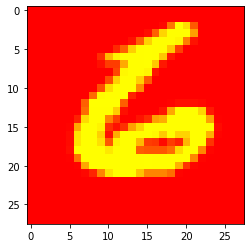

In [253]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.imshow(example, cmap=mpl.cm.autumn)

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import svm

Testing and training sets were created using train_test_split. Only first 5000 of data set was used for computational limitations

In [259]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"][:5000], mnist["target"][:5000], test_size=0.2)

All the following models will be using the target data that contains all digits such as the following test target.

In [260]:
print(y_test)

[9 9 9 7 8 6 7 1 5 3 1 2 8 0 3 7 9 2 7 8 2 8 1 8 4 6 6 9 0 7 3 8 7 2 9 4 1
 7 9 9 9 1 5 7 2 1 4 0 2 6 2 3 7 5 5 1 0 0 1 8 5 1 1 6 3 0 4 0 7 5 3 9 1 0
 9 5 9 2 2 2 7 8 4 5 5 9 4 8 2 9 9 1 7 0 8 4 4 3 6 9 3 7 9 9 8 4 3 5 3 3 0
 6 7 0 4 2 6 6 0 9 0 3 5 5 7 7 4 4 2 1 7 4 8 0 9 8 0 9 1 8 9 2 6 0 5 0 1 7
 1 9 5 3 5 3 6 0 2 5 5 7 2 7 7 1 1 5 6 0 3 5 2 1 9 3 6 5 8 4 9 4 7 5 8 8 0
 2 3 2 3 4 8 2 4 6 9 6 6 7 7 4 3 5 3 4 4 5 9 3 4 7 9 5 1 4 3 5 4 3 9 2 6 2
 6 2 1 9 6 5 3 5 0 1 6 9 8 0 1 0 3 0 2 2 9 0 0 6 3 6 7 4 6 6 2 0 9 7 3 1 2
 4 1 4 8 5 7 5 6 9 4 8 4 9 8 3 5 4 6 7 5 1 5 1 5 8 4 0 7 5 7 3 3 6 0 8 5 9
 1 1 4 6 8 8 4 7 7 4 3 5 9 1 7 5 2 7 4 3 3 7 1 0 1 7 7 3 4 7 6 4 5 4 6 3 5
 0 1 5 9 2 5 1 5 0 3 0 7 0 3 4 2 2 1 1 4 6 8 7 2 9 9 5 8 9 8 9 0 3 6 5 3 9
 1 2 6 3 9 2 9 0 8 9 6 2 0 8 1 2 6 4 3 0 6 2 7 1 3 7 3 3 0 0 3 7 0 2 3 7 9
 6 3 7 4 1 5 0 1 8 2 3 7 0 3 4 8 8 3 8 3 3 7 4 8 0 2 5 5 4 7 7 7 5 8 4 2 1
 1 0 0 7 3 9 9 5 5 5 9 2 4 9 8 2 9 2 6 9 5 9 8 5 0 0 2 2 7 4 3 8 9 4 3 9 6
 0 9 7 9 1 5 3 2 8 7 3 0 

In [261]:
svm_clf = svm.SVC(kernel="linear",)

In [262]:
mod = svm_clf.fit(X_train, y_train)


In [263]:
svm_clf.fit(X_train, y_train)

y_prediction = svm_clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, svm_clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, y_prediction))
print (" Confusion matrix ", confusion_matrix(y_test, y_prediction))

Train Accuracy ::  1.0
Test Accuracy  ::  0.915
 Confusion matrix  [[ 87   0   0   1   0   0   0   0   0   0]
 [  0 118   0   0   1   0   0   1   0   0]
 [  1   1  98   0   3   0   1   2   2   0]
 [  0   2   3  82   0  12   0   2   0   2]
 [  0   0   0   0  94   0   0   0   0   1]
 [  2   0   0   2   2  82   0   0   1   2]
 [  2   0   1   0   0   1  89   0   2   0]
 [  0   0   1   0   1   0   0 104   0   1]
 [  1   0   5   1   0   3   1   0  74   3]
 [  0   1   3   0   6   0   0   7   1  87]]


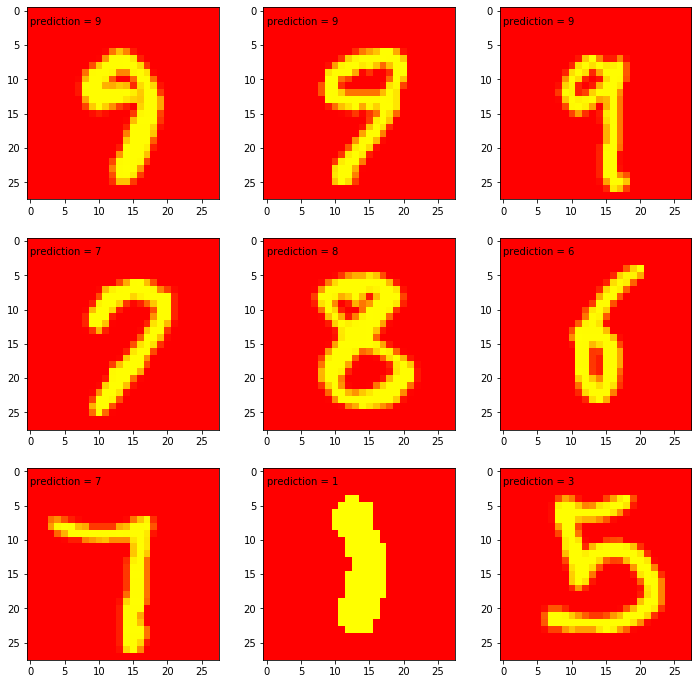

In [264]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.autumn)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()


----------------------------------------------------------
# Decision Tree

------------------------------------------------------ 
Decision tree (DT) is one of the few transparant AI models that allow for the explanation of decison making by the classifier. Every node of the tree asks a question about the data set. The issue with applying this the techhnique here is that it can lead to overfitting. The deeper a decision tree, error reduces but overfitting increases. In adition, the task at hand is primarily an image classification task, not for example, medical decision making algorythem. And it is unclear how the output of a flow chart from the model can be valuable. There are also too many obscure features, such as each pixel of the image. Therefore the transparancy that DT provides for this task may not be so valuable. 



In [265]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import timeit

In [266]:
tic=timeit.default_timer()

TreeCLF = tree.DecisionTreeClassifier()
print (TreeCLF)
tree = TreeCLF.fit(X_train,y_train)
t_prediction = TreeCLF.predict(X_test)
scoreTree = TreeCLF.score(X_test,y_test)
print(scoreTree)

toc=timeit.default_timer()
timeee= toc - tic
tstamp= print("\nTIME PASSED: ",toc-tic)
print("\nTIME PASSED: ",timeee)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.755

TIME PASSED:  0.6373331590002635

TIME PASSED:  0.6373331590002635


In [267]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                #feature_names= ["Fever","Nausea","Lumbar_pain","Urine","Mic_Pain","Buring"], 
                class_names= ["1","2","3","4","5","6","7","8","9","10"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.51652 to fit



The flowchart above is extremely large but you can still download it to see it in full size and appreciate the complexity.

In [269]:
import itertools


def Eval (model):

    predictions = model.predict(X_test)




    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting normalize=True.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("\nNormalized confusion matrix")
        else:
            print('\nConfusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



    
    print ("\nTrain Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("\nTest Accuracy  : ", accuracy_score(y_test, predictions))
    confmat = confusion_matrix(y_test, predictions)
    #print (" Confusion matrix ", confmat)

        #plots confusion matrix non-normalized
    cm = metrics.confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
    plt.show()

    #plots confusion matrix normalized
    plot_confusion_matrix(cm, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], normalize=True)
    plt.show()

    j = 331
    for i in range(0,9):
        example = X_test[i].reshape(28, 28)
        plt.subplot(j); plt.imshow(example, cmap=mpl.cm.autumn)
        plt.text(0, 5, "prediction = {}".format(predictions[i]))
        j+=1

    plt.show()
    from sklearn.metrics import classification_report
    
    print("\nCLASSIFICATION REPORT WITH PERCISION AND REACALL\n")
    target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
    print(classification_report(y_test, predictions, target_names=target_names))
    
    print (" \nTHE MOST IMPORTANT PIXELS (features)")
    try:
        impz= model.feature_importances_.reshape(28, 28)
        plt.imshow(impz, cmap=mpl.cm.autumn)

        plt.figure(figsize=(12, 12))
    except:
        print( "\nFeature importance is not possible in this model since it is unsupervised\n" )





Train Accuracy :  1.0

Test Accuracy  :  0.755

Confusion matrix, without normalization


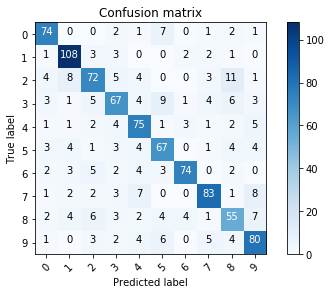


Normalized confusion matrix


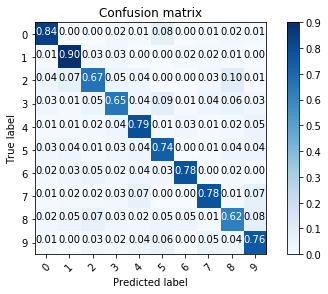

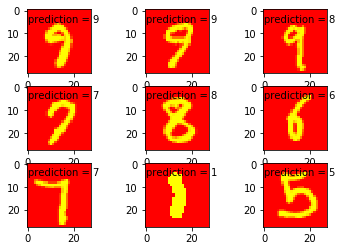


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        88
           1       0.82      0.90      0.86       120
           2       0.73      0.67      0.70       108
           3       0.71      0.65      0.68       103
           4       0.71      0.79      0.75        95
           5       0.69      0.74      0.71        91
           6       0.88      0.78      0.83        95
           7       0.82      0.78      0.80       107
           8       0.62      0.62      0.62        88
           9       0.73      0.76      0.75       105

    accuracy                           0.76      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.76      0.76      0.75      1000

 
THE MOST IMPORTANT PIXELS (features)


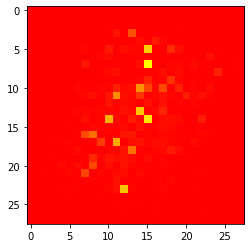

<Figure size 864x864 with 0 Axes>

In [270]:
Eval(tree)


----------------------------------------------------------
## Random Forest

------------------------------------------------------ 

The benefit of using Random Forest (RF) is that it avoids the overfitting that is likely to occur with decision tree. Random forest algorithem averages probabilities of multiple decision tress and as evident below, gives a more accurate prediction.

In [272]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [273]:
tic
RandCLF = RandomForestClassifier()
RndTree = RandCLF.fit(X_train,y_train)
print (RndTree)
toc
print('TIME PASSED', toc-tic)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
TIME PASSED 0.6373331590002635


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Train Accuracy :  0.998

Test Accuracy  :  0.891

Confusion matrix, without normalization


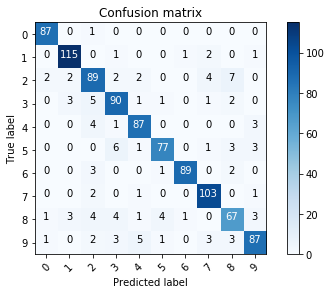


Normalized confusion matrix


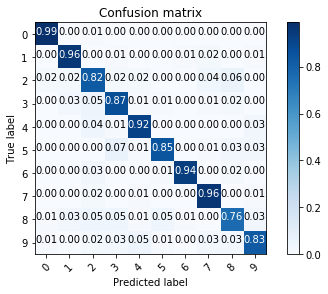

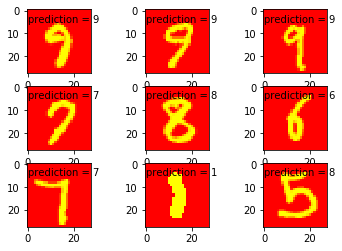


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.93      0.96      0.95       120
           2       0.81      0.82      0.82       108
           3       0.84      0.87      0.86       103
           4       0.89      0.92      0.90        95
           5       0.92      0.85      0.88        91
           6       0.98      0.94      0.96        95
           7       0.90      0.96      0.93       107
           8       0.80      0.76      0.78        88
           9       0.89      0.83      0.86       105

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

 
THE MOST IMPORTANT PIXELS (features)


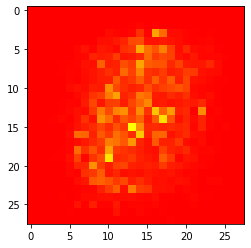

<Figure size 864x864 with 0 Axes>

In [274]:
Eval(RndTree)


----------------------------------------------------------
## KNN Algorythem

------------------------------------------------------ 
K-Nearest Neighbour is a simple non-paramentric classifier, meaning the number of paramenters are not pre determined. KNN looks at K points from the training set that are closest to the test set. Since KNN is unsupervised the training set is not used to generalize to other data. Predictions are made on the spot, therefore the most time  the computation takes is the prediction phase. In cases where you do not know the best K you take a best guess estimate of k. Ulternatively, you can induce a Voroni Tessellation by chosing a k=1. In this scenario I experimented with k=1 k=3 and k=10.

In [287]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, p= 1)
knnCFL = neigh.fit(X_train,y_train) 
print ("Current Setup: k=3\n\n", knnCFL)

Current Setup: k=3

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')



Train Accuracy :  0.96325

Test Accuracy  :  0.921

Confusion matrix, without normalization


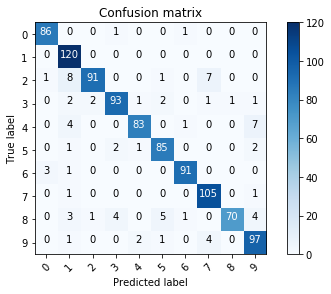


Normalized confusion matrix


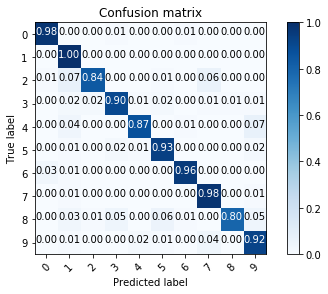

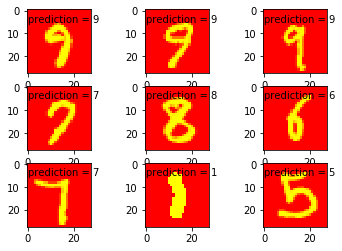


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.85      1.00      0.92       120
           2       0.97      0.84      0.90       108
           3       0.93      0.90      0.92       103
           4       0.95      0.87      0.91        95
           5       0.90      0.93      0.92        91
           6       0.97      0.96      0.96        95
           7       0.90      0.98      0.94       107
           8       0.99      0.80      0.88        88
           9       0.87      0.92      0.89       105

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised

TIME:  0.6373331590002635 



In [280]:
tic
Eval(knnCFL)
toc
print("TIME: ", toc-tic,"\n")

In [288]:
neigh = KNeighborsClassifier(n_neighbors=10, p= 2)
knnCFL = neigh.fit(X_train,y_train) 
print ("Current Setup: k=10\n\n", knnCFL)

Current Setup: k=10

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')



Train Accuracy :  0.94125

Test Accuracy  :  0.93

Confusion matrix, without normalization


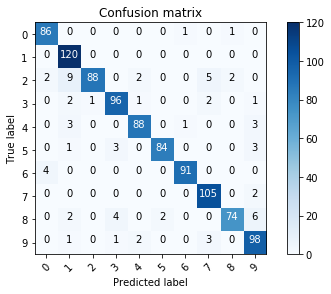


Normalized confusion matrix


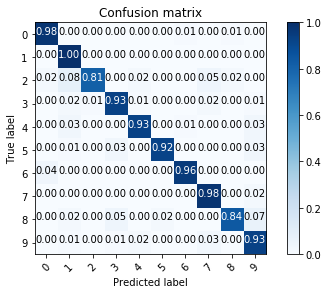

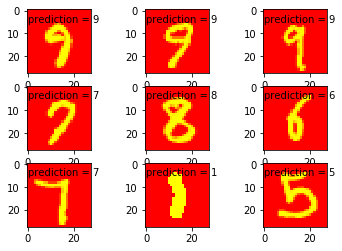


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        88
           1       0.87      1.00      0.93       120
           2       0.99      0.81      0.89       108
           3       0.92      0.93      0.93       103
           4       0.95      0.93      0.94        95
           5       0.98      0.92      0.95        91
           6       0.98      0.96      0.97        95
           7       0.91      0.98      0.95       107
           8       0.96      0.84      0.90        88
           9       0.87      0.93      0.90       105

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised



In [289]:
Eval(knnCFL)

In [290]:
neigh = KNeighborsClassifier(n_neighbors=1, p= 3, n_jobs = -1)
knnCFL = neigh.fit(X_train,y_train) 
print ("Current Setup: k=1\n\n", knnCFL)

Current Setup: k=1

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
                     weights='uniform')



Train Accuracy :  1.0

Test Accuracy  :  0.93

Confusion matrix, without normalization


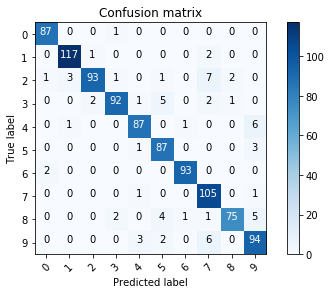


Normalized confusion matrix


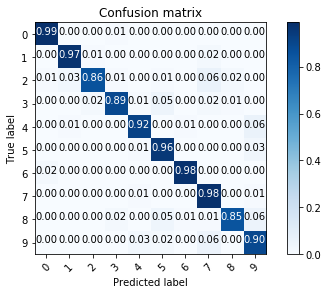

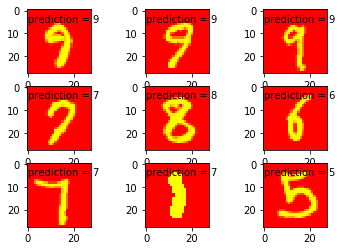


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.97      0.97      0.97       120
           2       0.97      0.86      0.91       108
           3       0.96      0.89      0.92       103
           4       0.94      0.92      0.93        95
           5       0.88      0.96      0.92        91
           6       0.98      0.98      0.98        95
           7       0.85      0.98      0.91       107
           8       0.96      0.85      0.90        88
           9       0.86      0.90      0.88       105

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised

TIME:  0.6373331590002635 



In [291]:
tic
Eval(knnCFL)
toc
print("TIME: ", toc-tic,"\n")

Classification with K = 1 took by far the longest and led to 100% accuracy with the training set, The test set however was less acurate. K = 3 produced the more balanced desults for both the training and test set. But it did not reach 100% accuracy for either.

# Neural Network:

Out of curiosity I also trained some neural networks to see how they compared. I assumed this would produce the most accurate results however, other classification methods produced stronger results. The neural nets also took the most ammount of time.

Bellow is the biggest network I ran with 1000 itterations and 7 layers of neurons, each with 1000 neurons.

In [292]:
from sklearn.neural_network import MLPClassifier
tic
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 1000), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)                         
toc
print("TIME: ", toc-tic,"\n")


TIME:  0.6373331590002635 



In [293]:
predictions = clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.935
 Confusion matrix  [[ 86   0   0   0   0   1   1   0   0   0]
 [  0 114   1   0   1   1   0   3   0   0]
 [  1   1  96   1   2   0   0   2   4   1]
 [  0   2   0  92   0   7   0   1   1   0]
 [  0   0   1   0  92   0   0   0   0   2]
 [  1   0   0   1   1  85   1   0   2   0]
 [  1   0   1   0   0   4  89   0   0   0]
 [  0   0   0   0   0   0   0 106   0   1]
 [  0   0   1   2   1   1   0   1  79   3]
 [  0   0   0   0   4   0   0   3   2  96]]



Train Accuracy :  1.0

Test Accuracy  :  0.935

Confusion matrix, without normalization


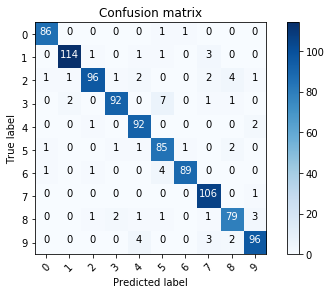


Normalized confusion matrix


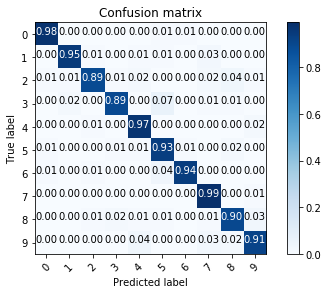

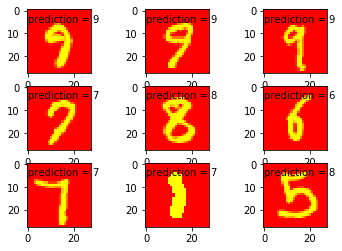


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        88
           1       0.97      0.95      0.96       120
           2       0.96      0.89      0.92       108
           3       0.96      0.89      0.92       103
           4       0.91      0.97      0.94        95
           5       0.86      0.93      0.89        91
           6       0.98      0.94      0.96        95
           7       0.91      0.99      0.95       107
           8       0.90      0.90      0.90        88
           9       0.93      0.91      0.92       105

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.93      1000
weighted avg       0.94      0.94      0.94      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised



In [294]:
Eval(clf)

In [295]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 100, 100, 100), random_state=1, max_iter= 100)

clf.fit(X_train, y_train)     

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


Train Accuracy :  1.0

Test Accuracy  :  0.915

Confusion matrix, without normalization


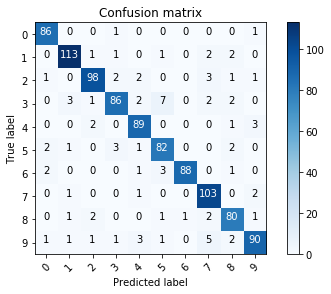


Normalized confusion matrix


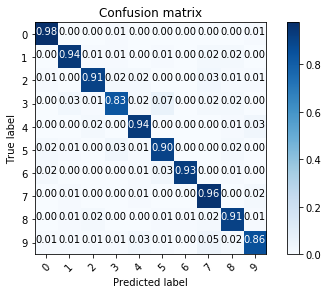

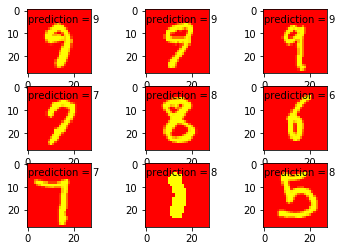


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        88
           1       0.94      0.94      0.94       120
           2       0.93      0.91      0.92       108
           3       0.91      0.83      0.87       103
           4       0.90      0.94      0.92        95
           5       0.86      0.90      0.88        91
           6       0.99      0.93      0.96        95
           7       0.88      0.96      0.92       107
           8       0.88      0.91      0.89        88
           9       0.92      0.86      0.89       105

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.91      1000
weighted avg       0.92      0.92      0.91      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised



In [296]:
Eval (clf)

As you can see from above a NN model with much less computational complexity than the first one produced very similar results. 

# Section 2 ( Classification of only 1 digit)

Here I am preprocessing the data by removing all other digits that are not 9 from the targets.

In [298]:
y_test[y_test < 9] = 0

In [299]:
print(y_test)

[9 9 9 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 9 0 0
 0 9 9 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0
 9 0 9 0 0 0 0 0 0 0 0 9 0 0 0 9 9 0 0 0 0 0 0 0 0 9 0 0 9 9 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 9 0 0 9 0 0 0 0 0 0 0
 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 9 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 0 0 0 0 9 0 0 0
 0 0 0 9 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0
 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9
 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 0 0 9 0 9 0 0 0 0 0 9
 0 0 0 0 9 0 9 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 9 9 0 0 0 9 0 0 9 0 0 9 0 0 9 0 9 0 0 0 0 0 0 0 0 0 0 9 0 0 9 0
 0 9 0 9 0 0 0 0 0 0 0 0 

In [300]:
y_train[y_train < 9] = 0

In [301]:
print(y_train)

[0 0 0 ... 0 0 0]


A new eval fx was made to reflect the new number of classes(2).

In [303]:
import itertools


def Eval (model):

    predictions = model.predict(X_test)




    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting normalize=True.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("\nNormalized confusion matrix")
        else:
            print('\nConfusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



    
    print ("\nTrain Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("\nTest Accuracy  : ", accuracy_score(y_test, predictions))
    confmat = confusion_matrix(y_test, predictions)
    #print (" Confusion matrix ", confmat)

        #plots confusion matrix non-normalized
    cm = metrics.confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, ['Not Nine','9'])
    plt.show()

    #plots confusion matrix normalized
    plot_confusion_matrix(cm, ['Not Nine','9'], normalize=True)
    plt.show()

    j = 331
    for i in range(0,9):
        example = X_test[i].reshape(28, 28)
        plt.subplot(j); plt.imshow(example, cmap=mpl.cm.autumn)
        plt.text(0, 5, "prediction = {}".format(predictions[i]))
        j+=1

    plt.show()
    from sklearn.metrics import classification_report
    
    print("\nCLASSIFICATION REPORT WITH PERCISION AND REACALL\n")
    target_names = ['Not Nine','9']
    print(classification_report(y_test, predictions, target_names=target_names))
    
    print (" \nTHE MOST IMPORTANT PIXELS (features)")
    try:
        impz= model.feature_importances_.reshape(28, 28)
        plt.imshow(impz, cmap=mpl.cm.autumn)

        plt.figure(figsize=(12, 12))
    except:
        print( "\nFeature importance is not possible in this model since it is unsupervised\n" )



# Binary decision tree

In [304]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import timeit

TreeCLF = tree.DecisionTreeClassifier()
print (TreeCLF)
tree = TreeCLF.fit(X_train,y_train)
t_prediction = TreeCLF.predict(X_test)
scoreTree = TreeCLF.score(X_test,y_test)
print(scoreTree)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.938


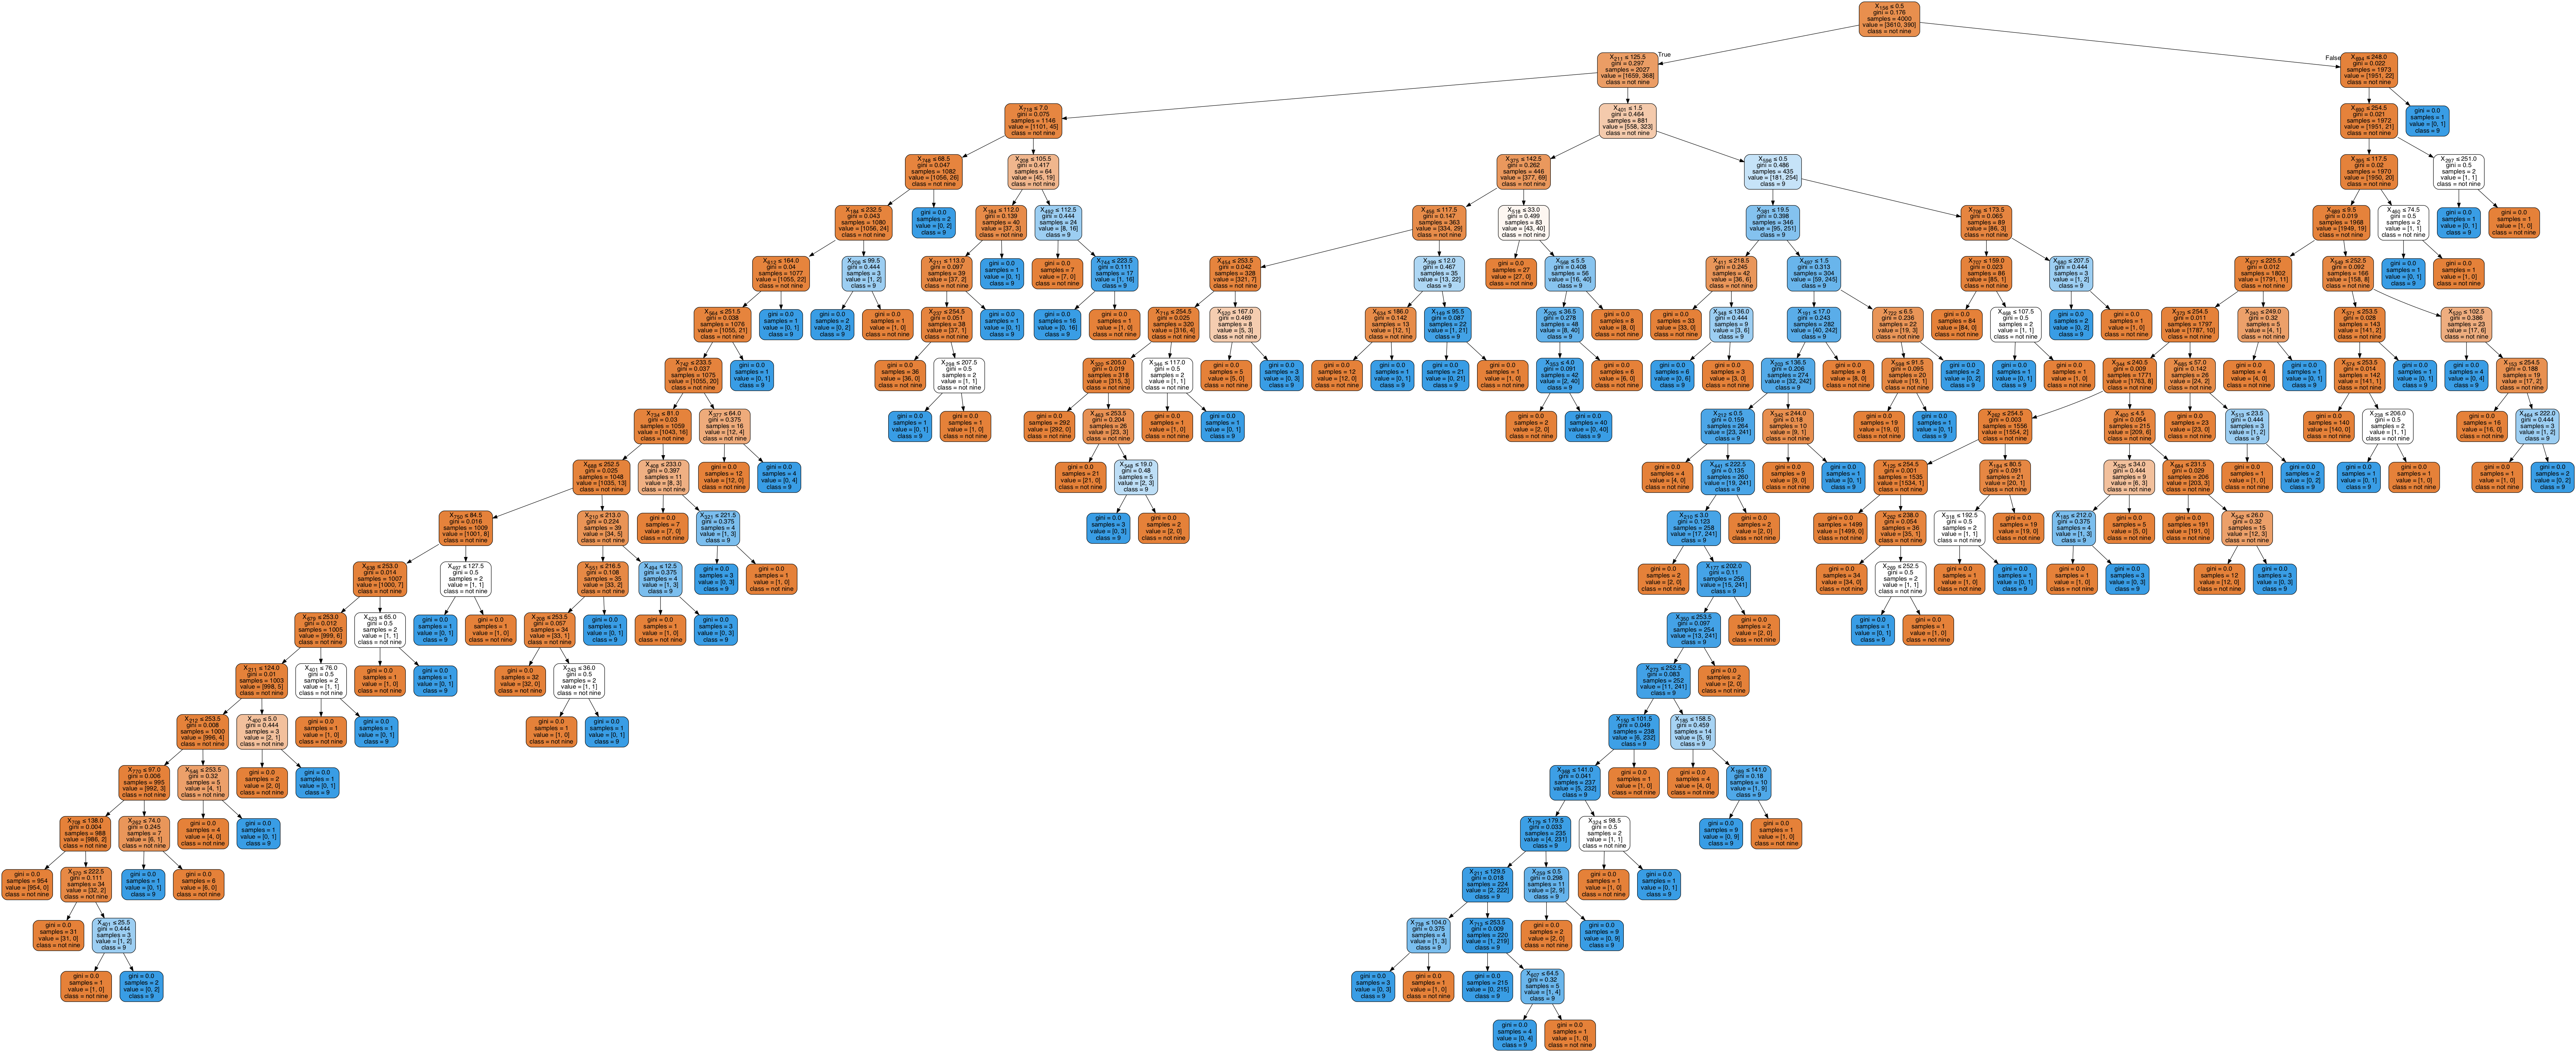

In [305]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                class_names= ["not nine","9"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Train Accuracy :  1.0

Test Accuracy  :  0.938

Confusion matrix, without normalization


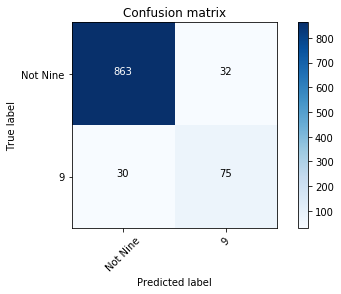


Normalized confusion matrix


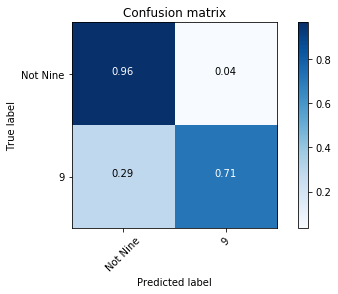

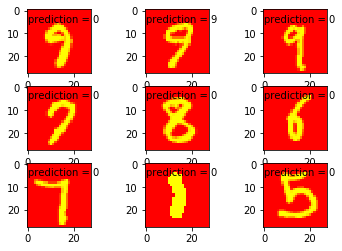


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

    Not Nine       0.97      0.96      0.97       895
           9       0.70      0.71      0.71       105

    accuracy                           0.94      1000
   macro avg       0.83      0.84      0.84      1000
weighted avg       0.94      0.94      0.94      1000

 
THE MOST IMPORTANT PIXELS (features)


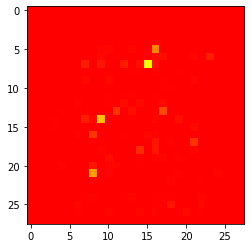

<Figure size 864x864 with 0 Axes>

In [306]:
Eval(tree)

# Binary Random Forest

In [307]:
tic
RandCLF = RandomForestClassifier()
RndTree = RandCLF.fit(X_train,y_train)
print (RndTree)
toc
print('TIME PASSED', toc-tic)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
TIME PASSED 0.6373331590002635


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Train Accuracy :  0.99625

Test Accuracy  :  0.956

Confusion matrix, without normalization


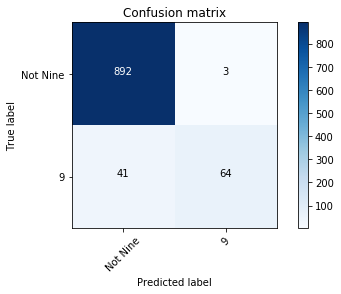


Normalized confusion matrix


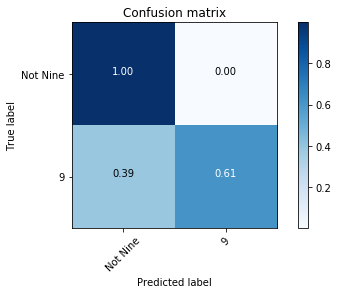

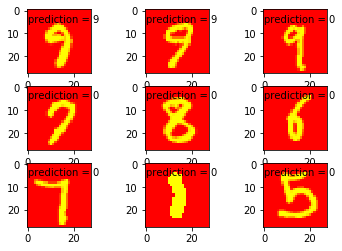


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

    Not Nine       0.96      1.00      0.98       895
           9       0.96      0.61      0.74       105

    accuracy                           0.96      1000
   macro avg       0.96      0.80      0.86      1000
weighted avg       0.96      0.96      0.95      1000

 
THE MOST IMPORTANT PIXELS (features)


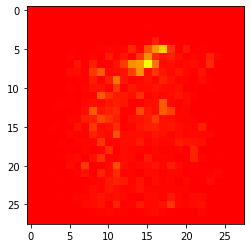

<Figure size 864x864 with 0 Axes>

In [308]:
Eval(RndTree)

# Binary KNN

In [309]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, p= 1)
knnCFL = neigh.fit(X_train,y_train) 
print ("Current Setup: k=3\n\n", knnCFL)

Current Setup: k=3

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')



Train Accuracy :  0.99075

Test Accuracy  :  0.977

Confusion matrix, without normalization


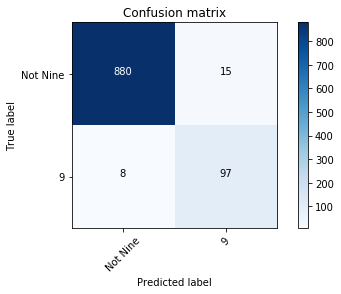


Normalized confusion matrix


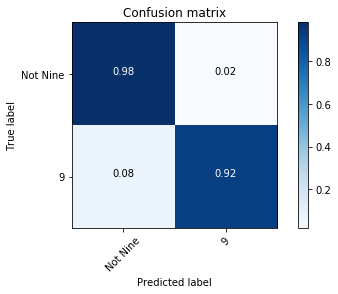

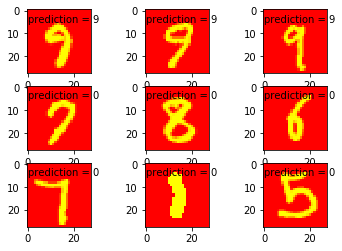


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

    Not Nine       0.99      0.98      0.99       895
           9       0.87      0.92      0.89       105

    accuracy                           0.98      1000
   macro avg       0.93      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised

TIME:  0.6373331590002635 



In [310]:
tic
Eval(knnCFL)
toc
print("TIME: ", toc-tic,"\n")

Final thoughts, Overall the models that were binary ran faster and had more acuracy.